Importing Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading in the data

In [16]:
df = pd.read_csv('./titanic/train.csv')

### Exploratory Analysis
Whole Dataset

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Exploratory Analysis
Focusing on <i>'Survived'</i> and <i>'Age'</i>

Counts of Survived vs Didn't Survive

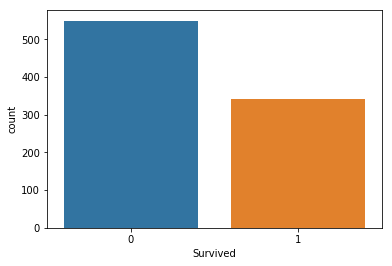

In [23]:
sns.countplot(x = 'Survived', data = df)

In [60]:
# Getting Raw Counts
df.groupby('Survived').PassengerId.count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Getting Distribution by Age

C:\Users\gallagh4\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


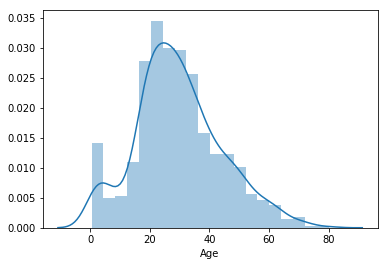

In [53]:
sns.distplot(df.Age.dropna(), kde = 'False')

Similar Histogram but showing breakdown by Survived

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

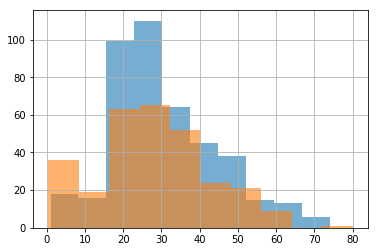

In [54]:
df.groupby('Survived').Age.hist(alpha=0.6)

Average age of passengers was roughly 28-29 years old. Lower than I would have expected...

In [45]:
print('Median: ',np.median(df['Age'].dropna()))
print('Mean: ', np.average(df['Age'].dropna()))

Median:  28.0
Mean:  29.69911764705882


There were 14 infants on board, and incredibly 12 of them survived.

In [56]:
df.loc[df['Age']<=1,].groupby('Survived').Age.count()

Survived
0     2
1    12
Name: Age, dtype: int64

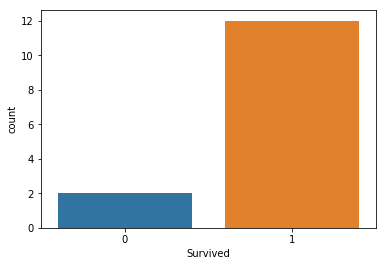

In [57]:
sns.countplot(x='Survived', data=df.loc[df['Age']<=1,]);

Age doesn't seem that indicative of survival. Similar patters with both:

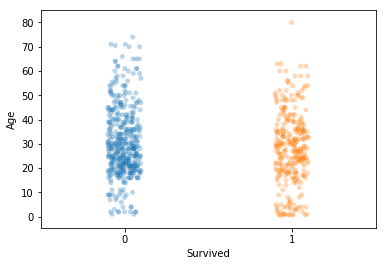

In [47]:
sns.stripplot(x='Survived', y='Age', data=df, alpha=0.3, jitter=True);